In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


Text(0.5, 1.0, '0')

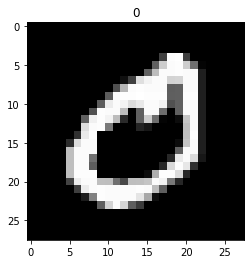

In [2]:
#obtenção dos dados e divisão automática entre treinamento e teste
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()
#visualização de imagens específicas
plt.imshow(x_treino[21], cmap='gray')
plt.title(y_treino[21])

In [3]:
#Mudança de dimenção, originalment 28x28, precisamos de 784
x_treino = x_treino.reshape((len(x_treino), np.prod(x_treino.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[0]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
#traformação dos dados para float
x_treino = (x_treino.astype('float32')/255.0)
x_teste = (x_teste.astype('float32')/255.0)

In [5]:
#tranfomação para o formato dummy
y_treino = np_utils.to_categorical(y_treino, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [6]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
#Camada de saida, softmax probabilidade
modelo.add(Dense(units=10, activation='softmax'))


In [7]:
#Visualização da estrutura da rede neural
modelo.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [8]:
#configuração dos parâmetros da rede neural e treinamento
#Na variavel historicos temos os historicos de execuções
modelo.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(x_treino, y_treino,
                       epochs=20,
                       validation_data=(x_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 2s 957us/step - loss: 0.4483 - accuracy: 0.8624 - val_loss: 0.1620 - val_accuracy: 0.9507

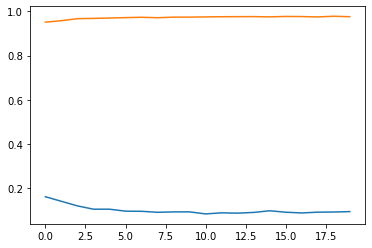

In [9]:
#grafico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])


In [10]:
#obtendo as previsoes
previsoes = modelo.predict(x_teste)
previsoes

array([[2.3354701e-13, 8.8267997e-11, 4.0442323e-08, ..., 9.9999893e-01,
        2.6302446e-10, 9.4777710e-07],
       [2.1581066e-10, 2.0780177e-04, 9.9977571e-01, ..., 2.7687724e-07,
        3.1203278e-08, 1.0130645e-12],
       [2.0517563e-10, 9.9997032e-01, 6.8836420e-07, ..., 7.3699534e-06,
        1.6151664e-05, 1.7457984e-07],
       ...,
       [1.8113155e-09, 2.4810728e-10, 1.4045442e-08, ..., 8.3642084e-07,
        3.3021870e-11, 8.2904592e-08],
       [6.1107372e-22, 1.1482672e-19, 3.7580945e-18, ..., 5.1361522e-20,
        6.0027365e-11, 4.2715523e-14],
       [5.3979048e-14, 1.3279464e-16, 1.6935224e-13, ..., 2.5557744e-21,
        5.4351124e-12, 4.9057130e-23]], dtype=float32)

In [11]:
#valor maximo e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 962,    1,    1,    1,    1,    1,   10,    2,    1,    0],
       [   0, 1123,    3,    2,    0,    1,    2,    1,    3,    0],
       [   1,    1, 1010,    2,    2,    0,    2,    9,    4,    1],
       [   0,    0,    3,  997,    0,    1,    0,    4,    5,    0],
       [   0,    0,    4,    0,  961,    0,    3,    1,    2,   11],
       [   3,    1,    0,   17,    1,  857,    5,    1,    3,    4],
       [   3,    3,    1,    0,    6,    5,  935,    0,    5,    0],
       [   0,    5,   10,    3,    0,    0,    0, 1005,    2,    3],
       [   3,    0,    6,   13,    6,    8,    1,    4,  932,    1],
       [   0,    2,    0,    8,   14,    2,    2,    7,    4,  970]],
      dtype=int64)

In [12]:
#previsão com um novo registro
y_treino[20]


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [14]:
#passo a mesma posição para o modelo prever
novo = x_treino[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis=0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]